<a href="../01_LTI/_index.ipynb">&larr; LTI-Index </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# Abtastung und Filterung eines Sensorsignals

Python-Musterlösung zur Übungsaufgabe "Filterung abgetasteter Signale"

In [1]:
import numpy as np
import scipy.signal as sig

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12,4)}) # set figures' size in inches

In [2]:
# ------------ Define variables ----------------
Ts = 1/200     # sampling period
f1 = 50.0        # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = max(6.0/f1, 10*Ts) # timespan for 6 signal periods or 10 Ts
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
t = np.arange(0,Tmax,tstep)  # (start,stop,step)
n = np.arange(0,round(N_Ts)) # sample n, step = 1 
xt = 1.5 + 0.5 * np.cos(2.0*np.pi*f1*t + phi0) # x(t).
xn = 1.5 + 0.5 * np.cos(2.0*np.pi*f1*n*Ts + phi0) # x[n]
#xn = zeros(len(xn)); xn[0] = 1 # Dirac-Stoß

Der Code im folgenden enthält einige Besonderheiten:

- Im Titel des Plots soll die Abtastfrequenz automatisch ausgeben werden. Dafür wird im auszugebenden String mit dem Platzhalter `%1.f` das Floating Point Format mit einer Nachkommastelle gesetzt und danach der Wert `1/T_S` übergeben .

- Die ersten 8 Werte des abgetasteten Signals sollen ins Kommandofenster gedruckt werden. Dazu wird der auszugebende Text zwischen Hochkommata übergeben, optional können dahinter weitere Formatierungsanweisungen gegeben werden. Hier wird mit `end=""` der automatische Zeilenvorschub nach dem Printkommando unterdrückt. 

  n :     0     1     2     3     4     5     6     7     8     9
x[n]:  2.00  1.50  1.00  1.50  2.00  1.50  1.00  1.50  2.00  1.50
y[n]:  2.00  0.50  0.75  1.12  1.44  0.78  0.61  1.20  1.40  0.80

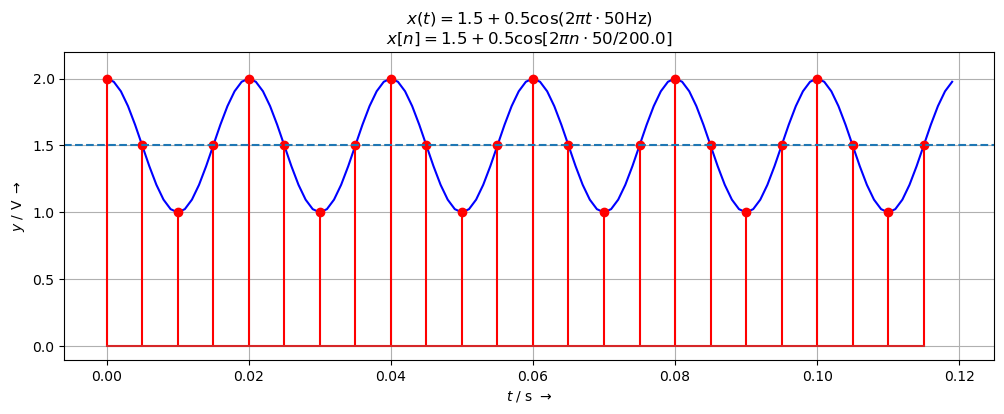

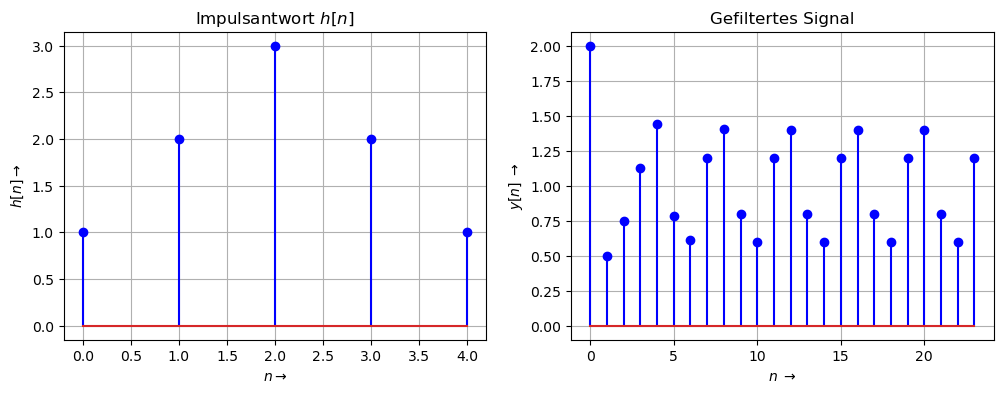

In [3]:
# ----- Plot "analog" and sampled signals -----
fig1, (ax1) = plt.subplots(1,1); ax1.grid(True)
ax1.set_xlabel(r'$t$ / s $\rightarrow$')
ax1.set_ylabel(r'$y$ / V $\rightarrow$')
ax1.set_title('$x(t) = 1.5 + \
0.5 \cos(2 \pi t \cdot 50 \mathrm{Hz})$\n\
$x[n] = 1.5 + 0.5 \cos[2 \pi n \cdot 50 / %.1f]$'\
%(1./Ts))
ax1.plot(t, xt, 'b-') # x(t) with blue line
ax1.stem(n*Ts, xn, linefmt='r-') # x[n], red stems
ax1.set_ylim(-0.1, 2.2)   # set y-limits to ymin, ymax
# horizontal line at y = 1.5
ax1.axhline(1.5, linestyle='--') 
# ------- Impulse response ------------------
fig2, (ax2, ax3) = plt.subplots(nrows=1,ncols=2)
h = [1, 2, 3, 2, 1] # impulse response MA-filter
#h = np.convolve([1,1,1],[1,1,1]) # cascaded filt.
#h = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125] # ~IIR
ax2.stem(range(len(h)), h, 'b-') # plot h[n]
ax2.set_xlabel(r'$n \rightarrow$')
ax2.set_ylabel(r'$h[n] \rightarrow$')
ax2.set_title(r'Impulsantwort $h[n]$'); ax2.grid(True)
# ------- Filtered signal -------------------
#yn = np.convolve(xn,h) # convolve & scale
yn = sig.lfilter([1,0],[1, 0.5],xn) # IIR filter
ax3.stem(range(len(yn)), yn, 'b') # y[n]
ax3.set_xlabel(r'$n\;\rightarrow$')
ax3.set_ylabel(r'$y[n]\;\rightarrow$')
ax3.set_title('Gefiltertes Signal'); ax3.grid(True)
# ------- Print signal and filtered signal ------
print('  n :', end="")
for i in range(10): print('%6d' %(i), end="")
print('\nx[n]:', end="")
for i in range(10): print('%6.2f' %(xn[i]), end="")
print('\ny[n]:', end="")
for i in range(10): print('%6.2f' %(yn[i]), end="")

***
**Copyright**

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.